<a href="https://colab.research.google.com/github/Arunav993/quantum-simulations/blob/main/TFIM/TFIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transverse Field Ising Model (TFIM)

This notebook implements a numerical simulation of the **Transverse Field Ising Model (TFIM)**,
which is indeed one of the most important models in quantum many-body physics.

## Model
\[
H = -J \sum_{i=1}^{N-1} Z_i Z_{i+1} - h \sum_{i=1}^{N} X_i
\]

where:
- \(J\) is the spin–spin interaction strength  
- \(h\) is the transverse magnetic field  
- \(Z_i, X_i\) are Pauli operators acting on spin \(i\)

## Objectives
- To construct the Hamiltonian using tensor products
- To diagonalize the Hamiltonian exactly
- To study the ground state properties
- To visualize the quantum phase transition



# Importing dependencies & setting up the configuration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import kron

np.set_printoptions(precision=4, suppress=True)
plt.style.use("seaborn-v0_8-darkgrid")



In [ ]:
# Pauli Matrices
I = np.array([[1, 0], [0, 1]], float)
X = np.array([[0, 1], [1, 0]], float)
Z = np.array([[1, 0], [0, -1]], float)


***Operator Placement Helper***

In [ ]:
def op_on_site(op, site, N):
    """
    Place operator 'op' on site 'site' in an N-spin chain.
    """
    result = 1
    for i in range(N):
        result = kron(result, op if i == site else I)
    return result

In [ ]:
# building the TFIM Hamiltonian

def TFIM_Hamiltonian(N, J, h):
    dim = 2**N
    H = np.zeros((dim, dim))

# Interaction terms Z_i Z_{i+1}
    for i in range(N - 1):
        H -= J * (op_on_site(Z, i, N) @ op_on_site(Z, i+1, N))

# Transverse field terms X_i
    for i in range(N):
        H -= h * op_on_site(X, i, N)

    return H



In [ ]:
#build and diagonalize
N = 4
J = 1.0
h = 0.5

H = TFIM_Hamiltonian(N, J, h)

eigvals, eigvecs = np.linalg.eigh(H)

print("Energy spectrum:")
eigvals

Energy spectrum:


array([-3.427 , -3.3322, -1.8268, -1.7321, -1.0948, -1.    , -0.6002,
       -0.5054,  0.5054,  0.6002,  1.    ,  1.0948,  1.7321,  1.8268,
        3.3322,  3.427 ])

***Ground State Magnetization***

In [ ]:

ground_state = eigvecs[:, 0]

Mx = sum(op_on_site(X, i, N) for i in range(N))

Mx_gs = np.real(ground_state.conj().T @ Mx @ ground_state) / N

print("Ground state ⟨Mx⟩ =", Mx_gs)

Ground state ⟨Mx⟩ = 0.4601264022710621


***Quantum Phase Transition Scan***

In [ ]:
hs = np.linspace(0, 2.5, 50)
Mx_values = []

for h in hs:
    H = TFIM_Hamiltonian(N, J=1.0, h=h)
    eigvals, eigvecs = np.linalg.eigh(H)
    gs = eigvecs[:, 0]
    Mx = sum(op_on_site(X, i, N) for i in range(N))
    Mx_values.append(np.real(gs.conj().T @ Mx @ gs) / N)

***Visualization: Magnetization Curve***

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


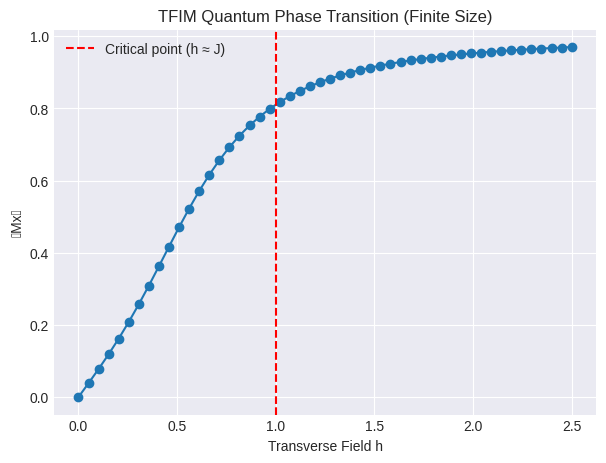

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(hs, Mx_values, marker='o')
plt.axvline(1.0, color='red', linestyle='--', label='Critical point (h ≈ J)')
plt.xlabel("Transverse Field h")
plt.ylabel("⟨Mx⟩")
plt.title("TFIM Quantum Phase Transition (Finite Size)")
plt.legend()
plt.show()

***Energy Gap Visualization***

In [ ]:
gaps = []

for h in hs:
    H = TFIM_Hamiltonian(N, J=1.0, h=h)
    eigvals, _ = np.linalg.eigh(H)
    gaps.append(eigvals[1] - eigvals[0])  # Energy gap


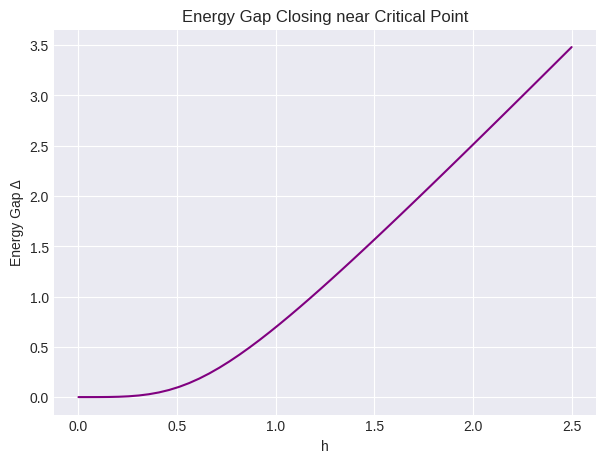

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(hs, gaps, color='purple')
plt.xlabel("h")
plt.ylabel("Energy Gap Δ")
plt.title("Energy Gap Closing near Critical Point")
plt.show()


## Conclusions
- The TFIM exhibits a quantum phase transition near \( h/J = 1 \)
- Ground-state magnetization changes sharply across the transition
- The energy gap closes near the critical point (finite-size signature)